In [1]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set GPU memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Limit GPU memory usage to 60% of total memory
        for gpu in gpus:
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=0.6)])
        
        # Your model training code goes here
        
    except RuntimeError as e:
        print(e)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model



In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
BATCH_SIZE = 16
IMAGE_SIZE = (224, 224)
CHANNELS = 3
EPOCHS = 10

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [7]:
train_generator = datagen.flow_from_directory(
    'C:/Thesis/Shrinked_data2',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='sparse',  # Update this line
    subset='training'
)


Found 6109 images belonging to 33 classes.


In [11]:
validation_generator = datagen.flow_from_directory(
    'C:/Thesis/Shrinked_data2',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='sparse',  # Update this line
    subset='validation'
)


Found 1524 images belonging to 33 classes.


In [12]:
test_datagen = ImageDataGenerator(
                rescale=1.0/255,
                rotation_range=20,
                width_shift_range=0.2,
                height_shift_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)


In [13]:
test_data_dir = 'C:\Thesis\Test_data'
target_size = (224, 224)
batch_size = 16

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    shuffle=False,  
    class_mode='sparse'
)

Found 846 images belonging to 33 classes.


In [15]:
base_model = InceptionResNetV2(weights='imagenet', include_top=False)


219055592/219055592 [==============================] - 19s 0us/step


In [16]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(200, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


In [17]:
for layer in base_model.layers:
    layer.trainable = False

In [18]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [19]:
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)


Epoch 1/15
382/382 [==============================] - 692s 2s/step - loss: 1.3163 - accuracy: 0.6176 - val_loss: 0.8062 - val_accuracy: 0.7480
Epoch 2/15
382/382 [==============================] - 670s 2s/step - loss: 0.6545 - accuracy: 0.7838 - val_loss: 0.7172 - val_accuracy: 0.7572
Epoch 3/15
382/382 [==============================] - 701s 2s/step - loss: 0.5533 - accuracy: 0.8155 - val_loss: 0.5752 - val_accuracy: 0.8058
Epoch 4/15
382/382 [==============================] - 694s 2s/step - loss: 0.4711 - accuracy: 0.8451 - val_loss: 0.4553 - val_accuracy: 0.8432
Epoch 5/15
382/382 [==============================] - 674s 2s/step - loss: 0.4228 - accuracy: 0.8591 - val_loss: 0.4917 - val_accuracy: 0.8333
Epoch 6/15
382/382 [==============================] - 672s 2s/step - loss: 0.4063 - accuracy: 0.8635 - val_loss: 0.4727 - val_accuracy: 0.8419
Epoch 7/15
382/382 [==============================] - 668s 2s/step - loss: 0.3652 - accuracy: 0.8736 - val_loss: 0.5098 - val_accuracy: 0.8346

In [20]:
history

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [22]:
history.history['loss'][:5] # show loss for first 5 epochs


[1.3163326978683472,
 0.6545441150665283,
 0.5533100962638855,
 0.47107505798339844,
 0.4228363335132599]

In [23]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Training and Validation Accuracy')

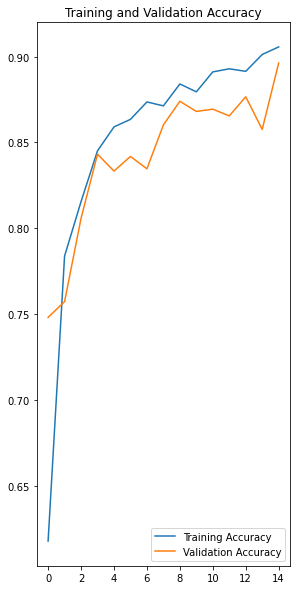

In [24]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

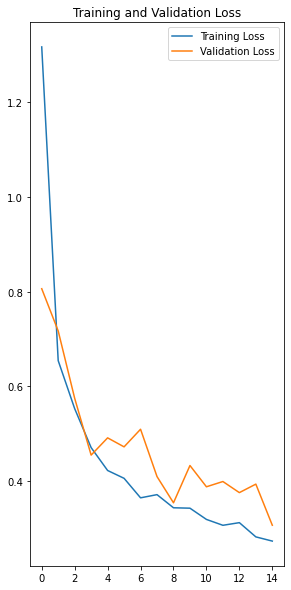

In [25]:
plt.figure(figsize=(10, 10))
EPOCHS = len(loss) # or len(val_loss)
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [26]:
test_loss, test_accuracy = model.evaluate(test_generator)


53/53 [==============================] - 64s 1s/step - loss: 0.2681 - accuracy: 0.9161


In [27]:
test_accuracy

0.9160756468772888

In [28]:
y_true = test_generator.classes


In [50]:
import numpy as np
from sklearn.metrics import classification_report
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1) 
report = classification_report(y_true, y_pred)


53/53 [==============================] - 72s 1s/step


In [52]:
print(report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       0.96      0.87      0.91        30
           2       0.88      1.00      0.94        30
           3       1.00      0.83      0.91        30
           4       1.00      0.90      0.95        30
           5       0.97      0.97      0.97        30
           6       0.91      0.97      0.94        30
           7       0.97      1.00      0.98        30
           8       1.00      1.00      1.00        30
           9       1.00      0.87      0.93        30
          10       0.89      0.83      0.86        30
          11       0.85      0.93      0.89        30
          12       1.00      1.00      1.00        30
          13       1.00      0.83      0.91        30
          14       0.89      0.83      0.86        30
          15       0.94      1.00      0.97        30
          16       0.81      0.97      0.88        30
          17       0.90    

In [47]:
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

report_str = classification_report(y_true, y_pred)
report_list = [line.split() for line in report_str.split('\n')[2:-5]]  # Extract relevant lines and split into list of lists

report_df = pd.DataFrame(report_list, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
report_df = report_df.set_index('Class')  
report_df = report_df.apply(pd.to_numeric)

print(report_df)


53/53 [==============================] - 68s 1s/step
       Precision  Recall  F1-Score  Support
Class                                      
0           0.93    0.90      0.92       30
1           0.93    0.90      0.92       30
2           0.86    1.00      0.92       30
3           0.90    0.87      0.88       30
4           0.96    0.87      0.91       30
5           1.00    0.97      0.98       30
6           0.90    0.87      0.88       30
7           0.81    1.00      0.90       30
8           1.00    1.00      1.00       30
9           0.89    0.83      0.86       30
10          0.97    0.93      0.95       30
11          0.91    0.97      0.94       30
12          0.97    1.00      0.98       30
13          1.00    0.87      0.93       30
14          0.93    0.83      0.88       30
15          0.94    0.97      0.95       30
16          0.75    0.90      0.82       30
17          0.93    0.87      0.90       30
18          0.97    0.93      0.95       30
19          0.92    0.8

In [49]:
report_df.to_csv('Classification report saved as classification_report.csv')

In [30]:
class_mapping = {
    0: 'Apple_Black_Rot',
    1: 'Apple_Cedar_Rust',
    2: 'Apple_Healthy',
    3: 'Apple_Scab',
    4: 'Cherry_Healthy',
    5: 'Cherry_Powdery_Mildew',
    6: 'Corn_Cercospora_Leaf_Spot',
    7: 'Corn_Common_Rust',
    8: 'Corn_Healthy',
    9: 'Corn_Northern_Leaf_Blight',
    10: 'Grape_Black_Rot',
    11: 'Grape_Esca_Black_Measles',
    12: 'Grape_Healthy',
    13: 'Grape_Leaf_Blight',
    14: 'Peach_Bacterial_Spot',
    15: 'Peach_Healthy',
    16: 'Pepper_bell_Bacterial_spot',
    17: 'Pepper_bell_healthy',
    18: 'Potato_Early_blight',
    19: 'Potato_Late_blight',
    20: 'Potato_healthy',
    21: 'Rice_Bacterial_leaf_blight',
    22: 'Rice_Brown_spot',
    23: 'Rice_Leaf_smut',
    24: 'Strawberry_Healthy',
    25: 'Strawberry_Leaf_Scorch',
    26: 'Tomato_Bacterial_spot',
    27: 'Tomato_Early_blight',
    28: 'Tomato_Late_blight',
    29: 'Tomato_Leaf_Mold',
    30: 'Wheat_Healthy',
    31: 'Wheat_Septoria',
    32: 'Wheat_Stripe_Rust'
}

precision = [1.00, 0.97, 0.91, 0.94, 1.00, 0.91, 0.94, 1.00, 1.00, 0.97, 1.00, 0.73, 1.00, 0.97, 1.00, 1.00, 0.83, 1.00, 1.00, 0.97, 0.88, 1.00, 1.00, 1.00, 1.00, 1.00, 0.97, 0.88, 1.00, 0.86, 1.00, 1.00, 1.00]
recall = [0.93, 0.97, 0.97, 0.97, 1.00, 1.00, 0.97, 1.00, 1.00, 0.93, 0.63, 1.00, 0.97, 1.00, 0.93, 0.93, 1.00, 0.83, 0.93, 0.93, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.93, 0.73, 1.00, 1.00, 1.00, 1.00, 1.00]
f1_score = [0.97, 0.97, 0.94, 0.95, 1.00, 0.95, 0.95, 1.00, 1.00, 0.95, 0.78, 0.85, 0.98, 0.98, 0.97, 0.97, 0.91, 0.91, 0.97, 0.95, 0.94, 1.00, 1.00, 1.00, 1.00, 1.00, 0.98, 0.90, 0.85, 0.92, 1.00, 1.00, 1.00, 1.00]
support = [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 15, 4, 4, 4, 30, 30, 30, 30, 30, 30, 10, 9, 20]

import pandas as pd

class_names = [class_mapping[i] for i in range(len(precision))]

table_data = []
for i in range(len(precision)):
    table_data.append([class_names[i], precision[i], recall[i], f1_score[i], support[i]])

Classification_Metrics = pd.DataFrame(table_data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])

Classification_Metrics


,Class,Precision,Recall,F1-Score,Support
0,Apple_Black_Rot,1.00,0.93,0.97,30
1,Apple_Cedar_Rust,0.97,0.97,0.97,30
2,Apple_Healthy,0.91,0.97,0.94,30
3,Apple_Scab,0.94,0.97,0.95,30
4,Cherry_Healthy,1.00,1.00,1.00,30
5,Cherry_Powdery_Mildew,0.91,1.00,0.95,30
6,Corn_Cercospora_Leaf_Spot,0.94,0.97,0.95,30
7,Corn_Common_Rust,1.00,1.00,1.00,30
8,Corn_Healthy,1.00,1.00,1.00,30
9,Corn_Northern_Leaf_Blight,0.97,0.93,0.95,30


In [35]:
Classification_Metrics.to_csv('classificationmetrics.csv')

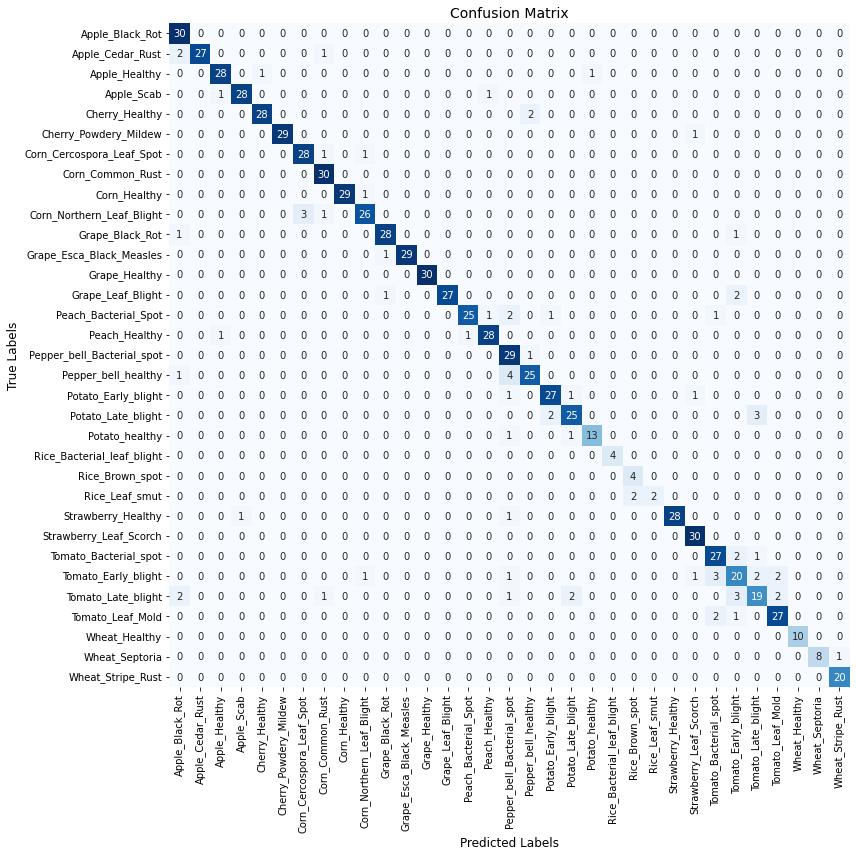

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=ax)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
ax.set_xticklabels(class_names, rotation=90, ha='center')
ax.set_yticklabels(class_names, rotation=0, va='center')

plt.tight_layout()
plt.show()


In [33]:
model.save('C:/Thesis/PlantVillageinceptionResNet.h5')
